In [0]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler

In [14]:
# Loading the data
df = pd.read_csv("/content/drive/My Drive/heart.csv")
df = df.drop_duplicates()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Description of columns


*   **age**: The person's age in years
*   **sex**: The person's sex (1 = male, 0 = female)
*   **cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
*   **trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)
*   **chol**: The person's cholesterol measurement in mg/dl
*   **fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
*   **restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
*   **thalach**: The person's maximum heart rate achieved
*   **exang**: Exercise induced angina (1 = yes; 0 = no)
*   **oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
*   **slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
*   **ca**: The number of major vessels (0-3)
*   **thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
*   **target**: Heart disease (0 = no, 1 = yes)



In [0]:
X = df.drop(['target'], axis=1)
y = df['target']
num_variables = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_variables = [var for var in X.columns if var not in num_variables]

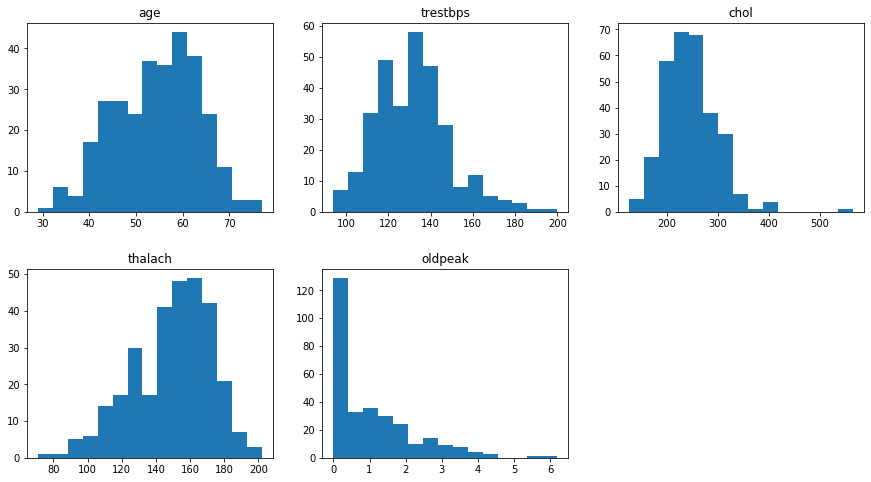

In [47]:
i = 1
plt.figure(figsize=(15, 8))
for column in num_variables:
  plt.subplot(2, 3, i)
  plt.subplots_adjust(hspace=0.3)
  plt.hist(data=df, x=column, bins=15)
  plt.title(column)
  i += 1

In [53]:
df[df['oldpeak'] > 5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


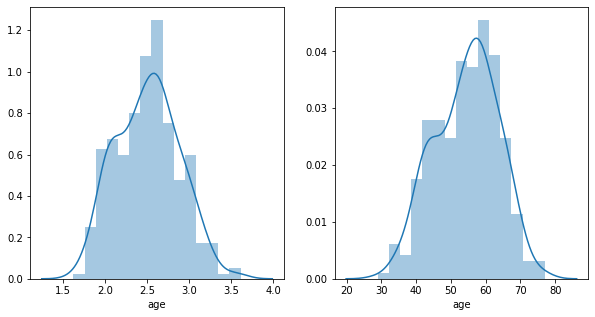

In [102]:
trans_age = np.exp((df['age'])/60)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.distplot(trans_age, bins=15)
plt.subplot(1, 2, 2)
sns.distplot(X['age'], bins=15)

In [0]:
df['age'] = np.exp((df['age'])/60)

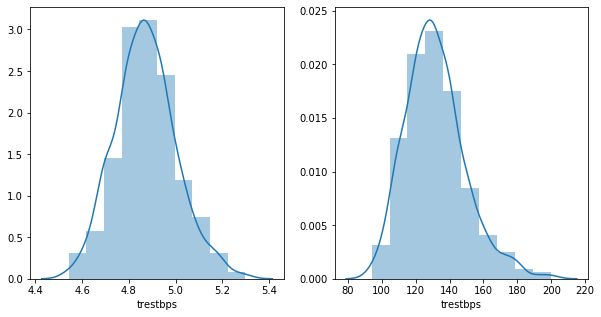

In [109]:
trans_age = np.log(df['trestbps'])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.distplot(trans_age, bins=10)
plt.subplot(1, 2, 2)
sns.distplot(X['trestbps'], bins=10)

In [0]:
df['trestbps'] = np.log(df['trestbps'])

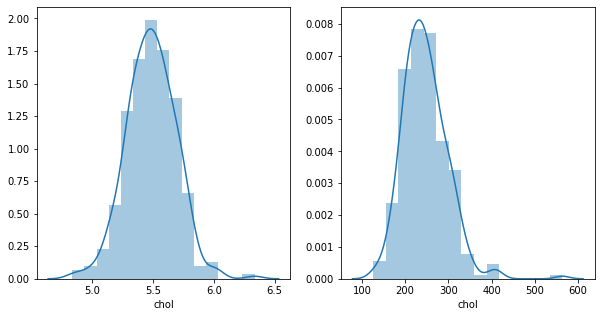

In [113]:
trans_col = np.log(df['chol'])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.distplot(trans_col, bins=15)
plt.subplot(1, 2, 2)
sns.distplot(X['chol'], bins=15)

In [0]:
df['chol'] = np.log(df['chol'])

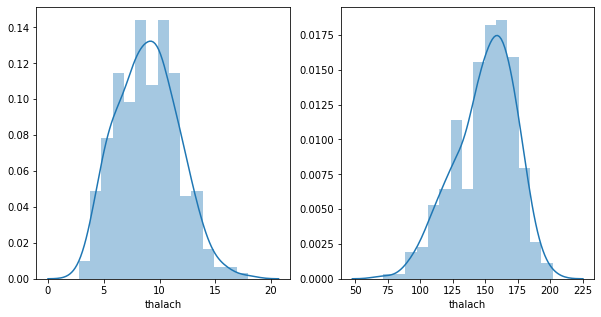

In [125]:
trans_col = np.exp(df['thalach'] / 70)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.distplot(trans_col, bins=15)
plt.subplot(1, 2, 2)
sns.distplot(X['thalach'], bins=15)

In [0]:
df['thalach'] = np.exp(df['thalach'] / 70)

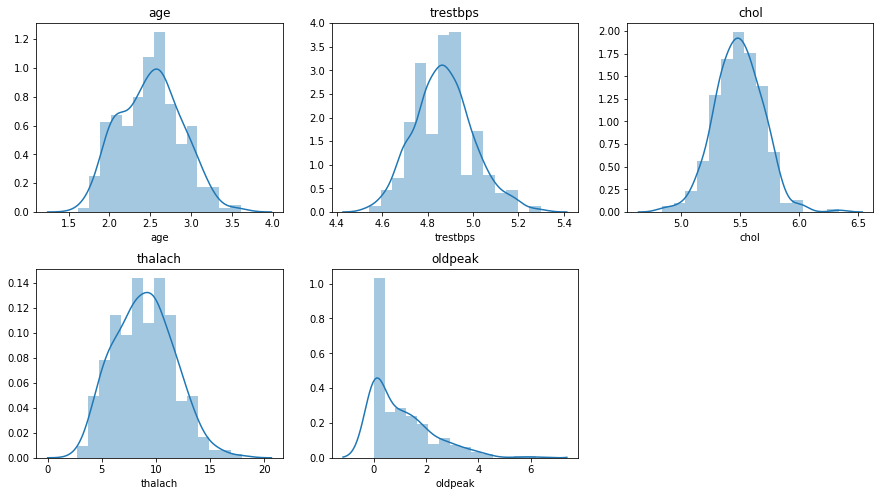

In [133]:
i = 1
plt.figure(figsize=(15, 8))
for column in num_variables:
  plt.subplot(2, 3, i)
  plt.subplots_adjust(hspace=0.3)
  sns.distplot(df[column], bins=15)
  plt.title(column)
  i += 1

In [0]:
sc = StandardScaler()
df_temp = pd.DataFrame()
for column in num_variables[:-1]:
  df_temp[column] = pd.Series(df[column])
df_temp = pd.DataFrame(sc.fit_transform(df_temp))
df['age'] = df_temp[0]
df['trestbps'] = df_temp[1]
df['chol'] = df_temp[2]
df['thalach'] = df_temp[3]

In [158]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.954932,1,3,0.810773,-0.175087,1,0,-0.141698,0,2.3,0,0,1,1
1,-1.750799,1,2,-0.028247,0.171876,0,1,2.046122,0,3.5,0,0,2,1
2,-1.406894,0,1,-0.028247,-0.829961,0,0,1.018262,0,1.4,2,0,2,1
3,0.107653,1,1,-0.643246,-0.112056,0,1,1.403188,0,0.8,2,0,2,1
4,0.222726,0,0,-0.643246,1.885623,0,1,0.499339,1,0.6,2,0,2,1


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


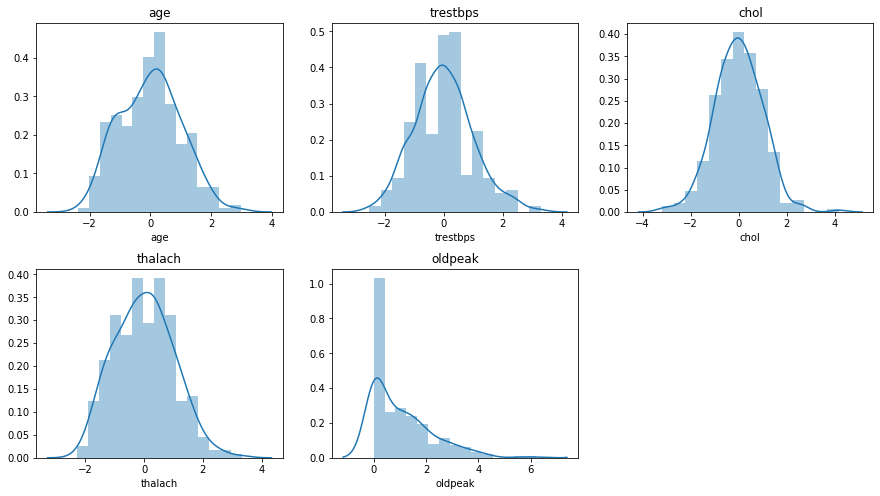

In [159]:
i = 1
plt.figure(figsize=(15, 8))
for column in num_variables:
  plt.subplot(2, 3, i)
  plt.subplots_adjust(hspace=0.3)
  sns.distplot(df[column], bins=15)
  plt.title(column)
  i += 1

In [0]:
for var in cat_variables:
  df[var] = df[var].astype('object')

In [167]:
df.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [0]:
df_copy = df

In [0]:
df = pd.get_dummies(df)

In [0]:
X = df.drop(['target'], axis=1)
y = df['target']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.15)

In [236]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score


# ML models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import confusion_matrix

xgb_model = XGBClassifier()
xgb_predictions = cross_val_predict(xgb_model, X_test, y_test, cv=5)
print(confusion_matrix(y_test, xgb_predictions))
xgb_scores = cross_val_score(xgb_model, X_test, y_test, scoring="accuracy", cv=5)
print("accuracy:", xgb_scores.mean())

[[102  18]
 [ 21 114]]
accuracy: 0.8470588235294118


In [233]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=300)
rf_predictions = cross_val_predict(rf_model, X_test, y_test, cv=5)
print(confusion_matrix(y_test, rf_predictions))
rf_scores = cross_val_score(rf_model, X_test, y_test, scoring="accuracy", cv=5)
print("accuracy:", rf_scores.mean())

[[103  17]
 [ 20 115]]
accuracy: 0.8627450980392156


In [246]:
# Support Vector Machine
svc_model = SVC(gamma="auto")
svc_predictions = cross_val_predict(svc_model, X_test, y_test, cv=5)
print(confusion_matrix(y_test, svc_predictions))
svc_scores = cross_val_score(svc_model, X_test, y_test, scoring="accuracy", cv=5)
print("accuracy:", svc_scores.mean())

[[102  18]
 [ 17 118]]
accuracy: 0.8627450980392156


In [235]:
# Naive Bayes
nb_model = GaussianNB()
nb_predictions = cross_val_predict(nb_model, X_test, y_test, cv=5)
print(confusion_matrix(y_test, nb_predictions))
nb_scores = cross_val_score(nb_model, X_test, y_test, scoring="accuracy", cv=5)
print("accuracy:", nb_scores.mean())

[[ 99  21]
 [ 25 110]]
accuracy: 0.8196078431372549


In [247]:
rf_model.fit(X_test, y_test)
svc_model.fit(X_test, y_test)
xgb_model.fit(X_test, y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [249]:
from sklearn.metrics import accuracy_score
y_predict = svc_model.predict(X_train)
print("accuracy:", accuracy_score(y_train, y_predict))

accuracy: 0.8222222222222222
